# A/B 테스트 

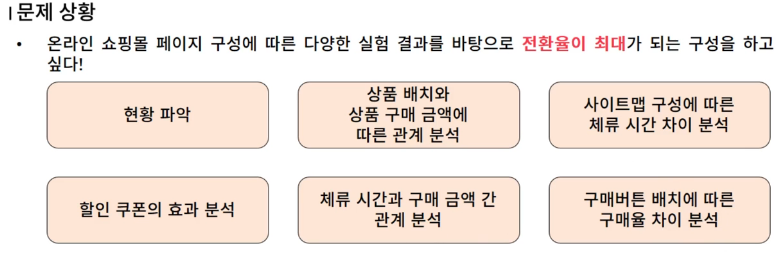

### STEP 1. 현황 파악
 #### - 관련 데이터 : 일별현황데이터.csv
 #### - 분석 내용
        - 구매자수, 방문자수, 총 판매 금액에 대한 기술 통계
        - 일자별 방문자수 추이 파악
        - 일자별 구매자수 추이 파악
        - 일자별 총 판매 금액 추이 파악
        
### STEP 2. 상품 배치와 상품 구매 금액에 따른 관계 분석
 #### - 관련 데이터 : 상품배치_A.csv, 상품배치_B.csv, 상품배치_C.csv
 #### - 분석 내용
        - 일원분산분석을 이용한 상품 배치에 따른 상품 구매 금액 평균 차이 분석 (상품 구매 금액 0원 미포함)
        - 일원분산분석을 이용한 상품 배치에 따른 상품 구매 금액 평균 차이 분석 (상품 구매 금액 0원 포함)
        - 카이제곱 검정을 이용한 구매 여부와 상품 배치 간 독립성 파악
        
### STEP 3. 사이트맵 구성에 따른 체류 시간 차이 분석
 #### - 관련 데이터 : 사이트맵_A.csv, 사이트맵_B.csv, 사이트맵_C.csv
 #### - 분석 내용
        - 사이트맵별 체류시간 평균 계산
        - 일원분산분석을 이용한 사이트맵에 따른 체류 시간 평균 차이 분석 (박스플롯 포함)
        
### STEP 4. 할인 쿠폰의 효과 분석
 #### - 관련 데이터 : 할인쿠폰발행효과.csv
 #### - 분석 내용
        - 발행후와 전의 구매 횟수 차이에 대한 기술 통계
        - 발행전, 발행후의 구매 횟수에 대한 박스플롯 시각화
        - 쌍체 표본 t-검정을 이용한 차이 유의성 검증
        
        
### STEP 5. 체류 시간과 구매 금액 간 관계 구매
 #### - 관련 데이터 : 체류시간_구매금액.csv
 #### - 분석 내용
        - 구매금액과 체류 시간의 산점도 시각화
        - 구매금액과 체류 시간 간 상관관계 분석     
        

### STEP 6. 구매버튼 배치에 따른 구매율 차이 분석
 #### - 관련 데이터 : 구매버튼_버튼타입_통계.csv
 #### - 분석 내용
        - 결측 대체
        - pivot table을 이용한 교차 테이블 생성
        - 카이제곱검정을 이용한 독립성 검정

---

### STEP 1. 현황 파악

In [1]:
import numpy as np
import pandas as pd
import os

C:\Users\PC\anaconda3\envs\vmconda\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\PC\anaconda3\envs\vmconda\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
C:\Users\PC\anaconda3\envs\vmconda\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


In [4]:
os.listdir('data/AB테스트')

['desktop.ini',
 '구매여부_버튼타입_통계.xlsx',
 '사이트맵_A.csv',
 '사이트맵_B.csv',
 '사이트맵_C.csv',
 '상품배치_A.csv',
 '상품배치_B.csv',
 '상품배치_C.csv',
 '일별현황데이터.csv',
 '체류시간_구매금액.csv',
 '할인쿠폰발행효과.csv']

In [11]:
data = pd.read_csv('data/AB테스트/일별현황데이터.csv', encoding='cp949')
data

,구매자수,방문자수,일자,총 판매 금액
0,328,1498,2019-01-01,6454056
1,301,1514,2019-01-02,5941439
2,219,1409,2019-01-03,3967404
3,276,1617,2019-01-04,5073708
4,311,1482,2019-01-05,6482795
...,...,...,...,...
360,253,1515,2019-12-27,5337541
361,276,1519,2019-12-28,5326248
362,313,1414,2019-12-29,6392399
363,266,1556,2019-12-30,5401130


In [12]:
data.describe()

,구매자수,방문자수,총 판매 금액
count,365.000000,365.000000,3.650000e+02
mean,298.347945,1502.024658,5.983674e+06
std,54.205014,52.454239,1.129601e+06
min,108.000000,1370.000000,2.002536e+06
25%,262.000000,1466.000000,5.222217e+06
50%,297.000000,1500.000000,5.990007e+06
75%,337.000000,1537.000000,6.734271e+06
max,444.000000,1638.000000,9.318244e+06


In [14]:
import matplotlib.pyplot as plt

%matplotlib inline

In [16]:
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 15
plt.rcParams["figure.figsize"] = (20, 5)

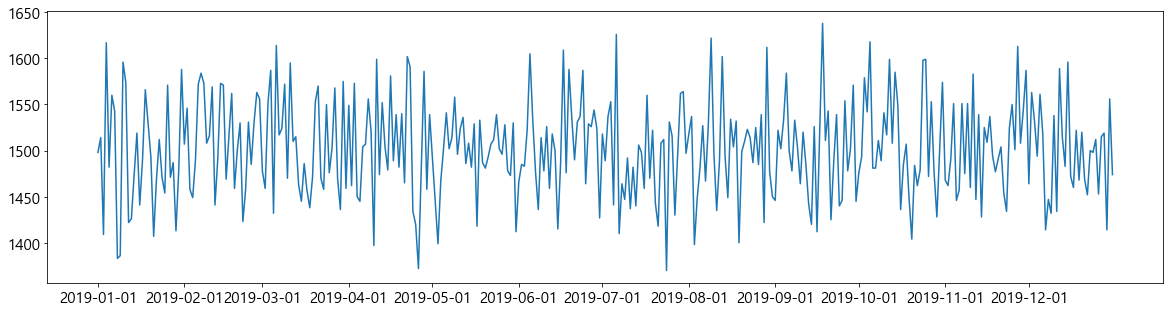

In [24]:
plt.plot(data['일자'], data['방문자수'])
xtick_range = np.cumsum([0, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30]) # 월별 일 수 누적을 통한 매월 1일 인덱스 정의 (12월 제외)
plt.xticks(xtick_range, data['일자'].loc[xtick_range])

plt.show()

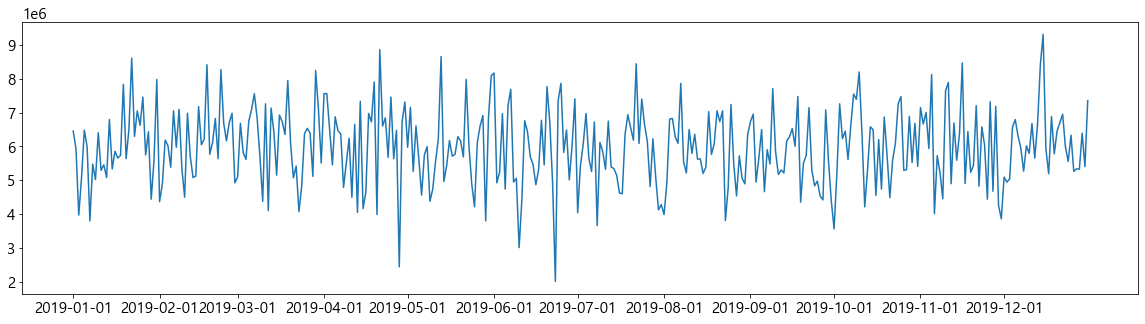

In [27]:
plt.plot(data['일자'], data['총 판매 금액'])
xtick_range = np.cumsum([0, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30]) # 월별 일 수 누적을 통한 매월 1일 인덱스 정의 (12월 제외)
plt.xticks(xtick_range, data['일자'].loc### STEP 6. 구매버튼 배치에 따른 구매율 차이 분석[xtick_range])

plt.show()

---

### STEP 2. 상품 배치와 상품 구매 금액에 따른 관계 분석

In [31]:
os.listdir('data/AB테스트')

['desktop.ini',
 '구매여부_버튼타입_통계.xlsx',
 '사이트맵_A.csv',
 '사이트맵_B.csv',
 '사이트맵_C.csv',
 '상품배치_A.csv',
 '상품배치_B.csv',
 '상품배치_C.csv',
 '일별현황데이터.csv',
 '체류시간_구매금액.csv',
 '할인쿠폰발행효과.csv']

In [34]:
place_A = pd.read_csv('data/AB테스트/상품배치_A.csv', encoding='cp949', index_col ='고객ID')
place_A

,구매금액
고객ID,
C-1,20459
C-2,0
C-3,19726
C-4,0
C-5,19049
...,...
C-194,0
C-195,19419
C-196,0


In [35]:
place_B = pd.read_csv('data/AB테스트/상품배치_B.csv', encoding='cp949', index_col='고객ID')
place_B

,구매금액
고객ID,
C-200,0
C-201,0
C-202,0
C-203,19055
C-204,0
...,...
C-355,0
C-356,15673
C-357,0


In [36]:
place_C = pd.read_csv('data/AB테스트/상품배치_C.csv', encoding='cp949', index_col='고객ID')
place_C

,구매금액
고객ID,
C-360,0
C-361,19844
C-362,19085
C-363,0
C-364,19671
...,...
C-503,0
C-504,0
C-505,0


----

In [43]:
# 구매금액이 0인 사람을 제외한 분석

place_A.loc[place_A['구매금액'] != 0]

,구매금액
고객ID,
C-1,20459
C-3,19726
C-5,19049
C-9,20084
C-10,21285
...,...
C-191,21148
C-192,20601
C-193,20463


In [44]:
place_A.loc[place_A['구매금액'] !=0]['구매금액']

고객ID
C-1      20459
C-3      19726
C-5      19049
C-9      20084
C-10     21285
         ...  
C-191    21148
C-192    20601
C-193    20463
C-195    19419
C-198    18669
Name: 구매금액, Length: 102, dtype: int64

In [45]:
place_A.loc[place_A['구매금액'] != 0]['구매금액'].values

array([20459, 19726, 19049, 20084, 21285, 20613, 20724, 19741, 20904,
       21149, 18413, 20677, 21404, 18858, 19411, 22192, 19355, 19495,
       17755, 18153, 19474, 20449, 18486, 19506, 16556, 19517, 18829,
       20436, 20334, 18465, 19985, 21761, 20064, 20032, 19972, 20734,
       19584, 19531, 19746, 19918, 19637, 20618, 19910, 19558, 21191,
       19376, 18158, 19121, 20905, 20437, 20921, 20519, 19659, 18555,
       21177, 20683, 20395, 19736, 21679, 21279, 21104, 22313, 19397,
       20507, 20300, 20551, 18567, 18703, 20523, 18809, 20092, 18230,
       20282, 20997, 20297, 19943, 21108, 18362, 21545, 19441, 22338,
       20800, 20113, 20097, 20454, 19894, 18728, 19011, 20189, 20239,
       18195, 21059, 20041, 21511, 20062, 18556, 19754, 21148, 20601,
       20463, 19419, 18669], dtype=int64)

In [47]:
place_A_without_zero = place_A.loc[place_A['구매금액'] != 0]['구매금액'].values
place_B_without_zero = place_B.loc[place_B['구매금액'] != 0]['구매금액'].values
place_C_without_zero = place_C.loc[place_C['구매금액'] != 0]['구매금액'].values

In [50]:
# 각 데이터가 정규분포를 따름을 확인 (일원분석을 위한 ANOVA)

from scipy.stats import *

print(kstest(place_A_without_zero , 'norm'))
print(kstest(place_B_without_zero , 'norm'))
print(kstest(place_C_without_zero , 'norm'))


KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)


In [54]:
# 일원분산분석 수행 

print(f_oneway(place_A_without_zero,
              place_B_without_zero,
              place_C_without_zero))

# p-value가 거의 0에 수렴 => A, B, C의 평균은 유의한 차이가 존재

F_onewayResult(statistic=76.88192392994758, pvalue=3.382319770772329e-26)


In [ ]:
# 사후 분석

from statsmodels.stats.multicomp

#### 구매 여부와 상품 배치 간 관계 파악

In [56]:
place_A['상품배치'] = 'A'
place_B['상품배치'] = 'B'
place_C['상품배치'] = 'C'

placement = pd.concat([place_A, place_B, place_C], axis=0, ignore_index=False)
placement['구매여부'] = (placement['구매금액'] !=0).astype(int)
placement.head()

,구매금액,상품배치,구매여부
고객ID,,,
C-1,20459,A,1
C-2,0,A,0
C-3,19726,A,1
C-4,0,A,0
C-5,19049,A,1


---

In [57]:
(placement['구매금액'] !=0)

고객ID
C-1       True
C-2      False
C-3       True
C-4      False
C-5       True
         ...  
C-503    False
C-504    False
C-505    False
C-506     True
C-507    False
Name: 구매금액, Length: 506, dtype: bool

In [59]:
# 교차 테이블 생성

cross_table = pd.crosstab(placement['상품배치'], placement['구매여부'])
cross_table

구매여부,0,1
상품배치,,
A,96,102
B,92,68
C,89,59


In [60]:
obs = cross_table.values
obs

array([[ 96, 102],
       [ 92,  68],
       [ 89,  59]], dtype=int64)

In [61]:
statistics, pvalue, dof, expected = chi2_contingency(obs)
print(pvalue)  # p-value가 0.06으로 구매여부와 상품배치는 관계가 있다고 보기 힘듦 (B와 C의 차이가 크지 않아서 그럴 수 있음)

# P-VALUE를 보되, 같은 통계량과 테이블을 같이봐야 정밀한 해석 가능

0.0686402428247769


In [64]:
# 기대값

pd.DataFrame(expected, columns = cross_table.columns, index = cross_table.index)

구매여부,0,1
상품배치,,
A,108.391304,89.608696
B,87.588933,72.411067
C,81.019763,66.980237


---

### STEP 3. 사이트맵 구성에 따른 체류 시간 차이 분석

In [69]:
os.listdir('data/AB테스트')

['desktop.ini',
 '구매여부_버튼타입_통계.xlsx',
 '사이트맵_A.csv',
 '사이트맵_B.csv',
 '사이트맵_C.csv',
 '상품배치_A.csv',
 '상품배치_B.csv',
 '상품배치_C.csv',
 '일별현황데이터.csv',
 '체류시간_구매금액.csv',
 '할인쿠폰발행효과.csv']

In [75]:
sitemap_A = pd.read_csv('data/AB테스트/사이트맵_A.csv', encoding='cp949')
sitemap_A

,고객ID,체류시간(분)
0,C-508,9
1,C-509,8
2,C-510,7
3,C-511,9
4,C-512,10
...,...,...
183,C-691,11
184,C-692,9
185,C-693,9
186,C-694,9


In [78]:
sitemap_B = pd.read_csv('data/AB테스트/사이트맵_B.csv', encoding='cp949')
sitemap_B

,고객ID,체류시간(분)
0,C-696,10
1,C-697,11
2,C-698,12
3,C-699,10
4,C-700,8
...,...,...
119,C-815,7
120,C-816,12
121,C-817,9
122,C-818,6


In [79]:
sitemap_C = pd.read_csv('data/AB테스트/사이트맵_C.csv', encoding='cp949')
sitemap_C

,고객ID,체류시간(분)
0,C-820,8
1,C-821,11
2,C-822,10
3,C-823,11
4,C-824,9
...,...,...
100,C-920,13
101,C-921,11
102,C-922,13
103,C-923,5


In [90]:
sitemap_A_time = sitemap_A['체류시간(분)'].values
sitemap_B_time = sitemap_B['체류시간(분)'].values
sitemap_C_time = sitemap_C['체류시간(분)'].values

In [93]:
A_mean = sitemap_A_time.mean()
B_mean = sitemap_B_time.mean()
C_mean = sitemap_C_time.mean()

print('사이트 맵 A의 체류 평균 시간: {} \n사이트 맵 B의 체류 평균 시간: {} \n사이트 맵 C의 체류 평균 시간 :{} '.format(A_mean, B_mean, C_mean))

사이트 맵 A의 체류 평균 시간: 9.404255319148936 
사이트 맵 B의 체류 평균 시간: 9.830645161290322 
사이트 맵 C의 체류 평균 시간 :9.514285714285714 


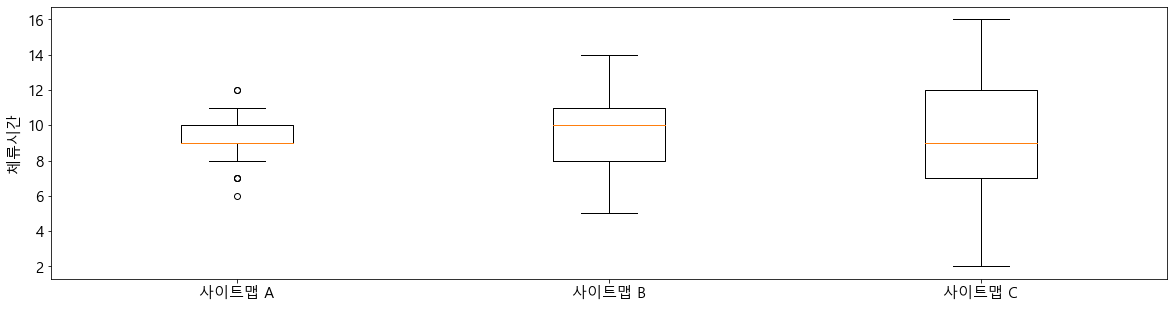

In [95]:
plt.boxplot([sitemap_A_time, sitemap_B_time, sitemap_C_time])
plt.xticks([1,2,3], ['사이트맵 A', '사이트맵 B', '사이트맵 C'])
plt.ylabel('체류시간')
plt.show()

In [98]:
 # 분산 분석을 위해 정규 분포를 따르는지 확인

print(kstest(sitemap_A_time, 'norm'))
print(kstest(sitemap_B_time, 'norm'))
print(kstest(sitemap_C_time, 'norm'))

KstestResult(statistic=0.9999999990134123, pvalue=0.0)
KstestResult(statistic=0.9999997133484281, pvalue=0.0)
KstestResult(statistic=0.9891262924445604, pvalue=1.320331854479069e-206)


In [100]:
# 일원분산분석 수행 

print(f_oneway(sitemap_A_time, sitemap_B_time, sitemap_C_time))

# p-value가 거의 0에 수렴 => A, B, C 의 평균은 유의한 차이가 존재하지 않음을 차이

F_onewayResult(statistic=1.6538817694924581, pvalue=0.19256727851054653)


### STEP 4. 할인 쿠폰의 효과 분석

In [101]:
coupon = pd.read_csv('data/AB테스트/할인쿠폰발행효과.csv', encoding='cp949')
coupon

,고객ID,발행전 구매 횟수,발행후 구매 횟수
0,C-925,3,1
1,C-926,0,0
2,C-927,0,3
3,C-928,0,4
4,C-929,4,4
...,...,...,...
149,C-1074,1,3
150,C-1075,4,3
151,C-1076,0,4
152,C-1077,0,0


In [103]:
# 발행 전후 구매횟수 차이에 대한 통계분석

(coupon['발행후 구매 횟수'] - coupon['발행전 구매 횟수']).describe()

count    154.000000
mean       1.259740
std        2.210507
min       -3.000000
25%        0.000000
50%        1.000000
75%        3.000000
max        6.000000
dtype: float64

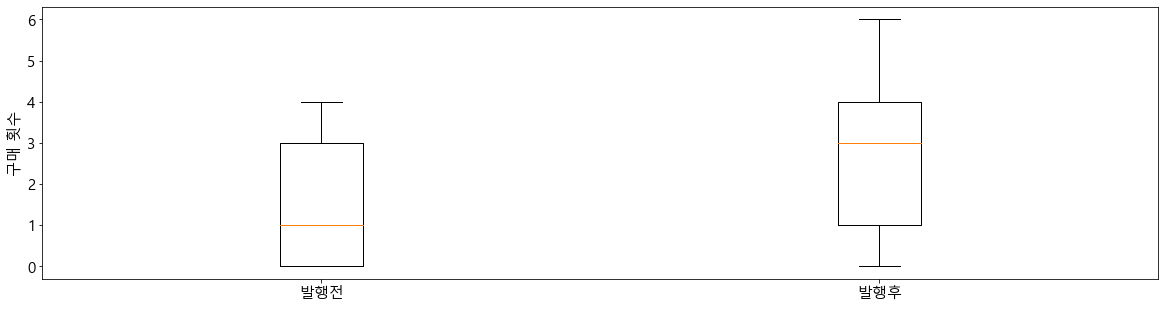

In [112]:
plt.boxplot([coupon['발행전 구매 횟수'], coupon['발행후 구매 횟수']])
plt.xticks([1, 2], ['발행전', '발행후'])
plt.ylabel("구매 횟수")
plt.show()

In [114]:
# 정규성 검정

kstest(coupon['발행후 구매 횟수'] - coupon['발행전 구매 횟수'], 'norm')

KstestResult(statistic=0.4253018161037688, pvalue=8.597340234980609e-26)

In [116]:
# t 검정

ttest_rel(coupon['발행후 구매 횟수'], coupon['발행전 구매 횟수'])

Ttest_relResult(statistic=7.07211673728211, pvalue=5.104217839308897e-11)

### STEP 5. 체류 시간과 구매 금액 간 관계 구매

In [117]:
time_money = pd.read_csv('data/AB테스트/체류시간_구매금액.csv', encoding='cp949')
time_money

,고객ID,구매금액,체류시간
0,C-1079,78625,9
1,C-1080,0,9
2,C-1081,105173,12
3,C-1082,0,14
4,C-1083,0,10
...,...,...,...
117,C-1196,0,5
118,C-1197,75573,7
119,C-1198,99731,11
120,C-1199,106312,9


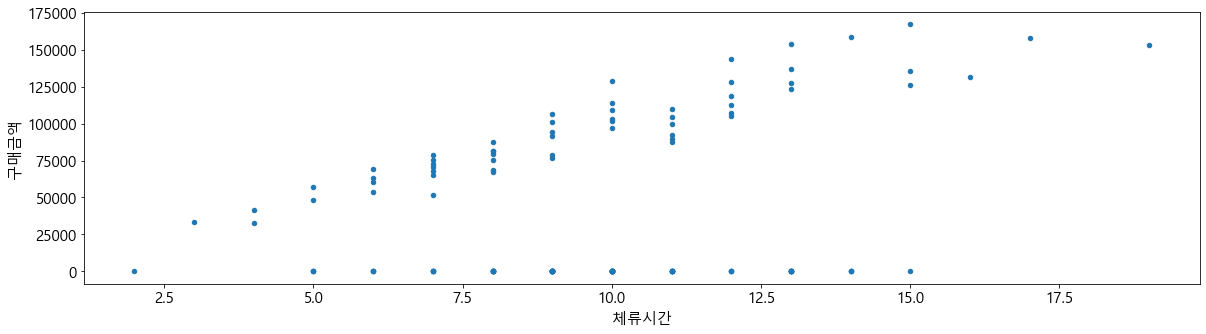

In [119]:
time_money.plot(kind='scatter', x ='체류시간', y='구매금액')
plt.show()

In [122]:
# 피어슨 상관관계로 선형관계 확인 

time_money.corr(method='pearson')

# 0.32 -> 약한 상관관계가 있음 

,구매금액,체류시간
구매금액,1.000000,0.320852
체류시간,0.320852,1.000000


In [123]:
# 스피어만 상관계수 

time_money.corr(method= 'spearman')

# 순위 관계 없음 

,구매금액,체류시간
구매금액,1.000000,0.229853
체류시간,0.229853,1.000000


In [125]:
# 체류시간은 길었지만 구매금액이 0인 회원 제거해보기

time_money_without_zero = time_money.loc[time_money['구매금액'] !=0]
time_money_without_zero

,고객ID,구매금액,체류시간
0,C-1079,78625,9
2,C-1081,105173,12
7,C-1086,68906,8
8,C-1087,67712,7
10,C-1089,143682,12
11,C-1090,75217,8
12,C-1091,78671,7
15,C-1094,81487,8
16,C-1095,87665,11
17,C-1096,152934,19


In [126]:
time_money_without_zero.corr(method='pearson')

,구매금액,체류시간
구매금액,1.000000,0.924526
체류시간,0.924526,1.000000


In [127]:
time_money_without_zero.corr(method='spearman')

,구매금액,체류시간
구매금액,1.000000,0.938099
체류시간,0.938099,1.000000


### STEP 6. 구매버튼 배치에 따른 구매율 차이 분석

In [130]:
button = pd.read_excel('data/AB테스트/구매여부_버튼타입_통계.xlsx')
button

,구매여부,버튼타입,고객 수
0,구매,A,9
1,NaN,B,9
2,NaN,C,15
3,비구매,A,93
4,NaN,B,85
5,NaN,C,89


In [133]:
button.fillna(method='ffill', inplace=True)  #ffill -> 결측이 아닌 바로 위의 값으로 채워줌
button

,구매여부,버튼타입,고객 수
0,구매,A,9
1,구매,B,9
2,구매,C,15
3,비구매,A,93
4,비구매,B,85
5,비구매,C,89


In [134]:
cross_table = pd.pivot_table(button, index= '구매여부', columns='버튼타입', values='고객 수')
cross_table

버튼타입,A,B,C
구매여부,,,
구매,9,9,15
비구매,93,85,89


In [136]:
obs = cross_table.values
obs

array([[ 9,  9, 15],
       [93, 85, 89]], dtype=int64)

In [138]:
statistics, pvalue, dof, expected = chi2_contingency(obs)
print(pvalue) # pvalue가 0.38로 구매여부와 버튼타입 간에는 관계가 없음을 확인

0.38033325575735993
